In [71]:
import pandas as pd
import numpy as np
import math

# Replace 'your_data.csv' with the actual file path
csv_file_path = 'lake-mead.csv'

# Read CSV into DataFrame
df = pd.read_csv(csv_file_path)

In [72]:
# Change to 60 min intervals
df = df[df.Minute == 0]

In [73]:
# Display the DataFrame to check if the import was successful
df

,Year,Month,Day,Hour,Minute,DHI,Clearsky DNI,Clearsky GHI,Clearsky DHI,GHI,DNI
0,2022,1,1,0,0,41,380,67,31,41,1
2,2022,1,1,1,0,0,0,0,0,0,0
4,2022,1,1,2,0,0,0,0,0,0,0
6,2022,1,1,3,0,0,0,0,0,0,0
8,2022,1,1,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17510,2022,12,31,19,0,201,878,517,76,214,25
17512,2022,12,31,20,0,176,887,530,76,182,11
17514,2022,12,31,21,0,133,861,480,73,135,5
17516,2022,12,31,22,0,15,801,375,67,15,0


In [74]:
print(df['DNI'].max())
print(df['DNI'].min())

1064
0


In [75]:
# Check normalization math 

#df['nGHI'] = df['GHI']/1113
#df

In [76]:
# Group by "Month" and "Day" columns and aggregate values into lists
grouped_df = df.groupby(['Month', 'Hour'])['DNI'].agg(list).reset_index()
grouped_df

,Month,Hour,DNI
0,1,0,"[1, 572, 569, 5, 504, 528, 524, 32, 555, 597, ..."
1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
283,12,19,"[219, 412, 568, 413, 555, 753, 741, 975, 962, ..."
284,12,20,"[147, 499, 916, 894, 398, 358, 920, 977, 955, ..."
285,12,21,"[260, 664, 191, 877, 175, 900, 902, 946, 934, ..."
286,12,22,"[654, 477, 836, 822, 37, 195, 0, 890, 876, 869..."


In [77]:
# Create a new DataFrame "gdfh" (gdfh = grouped data frame, hour) with the desired structure
gdfh = pd.DataFrame({
    'MonthL': grouped_df['Month'],
    'HourL': grouped_df['Hour'],
    'DNI_list': grouped_df['DNI']
})

# Display the new DataFrame "gdfh"
gdfh

,MonthL,HourL,DNI_list
0,1,0,"[1, 572, 569, 5, 504, 528, 524, 32, 555, 597, ..."
1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
283,12,19,"[219, 412, 568, 413, 555, 753, 741, 975, 962, ..."
284,12,20,"[147, 499, 916, 894, 398, 358, 920, 977, 955, ..."
285,12,21,"[260, 664, 191, 877, 175, 900, 902, 946, 934, ..."
286,12,22,"[654, 477, 836, 822, 37, 195, 0, 890, 876, 869..."


In [78]:
gdfh['DNI_daily_avg'] = gdfh['DNI_list'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

gdfh

,MonthL,HourL,DNI_list,DNI_daily_avg
0,1,0,"[1, 572, 569, 5, 504, 528, 524, 32, 555, 597, ...",415.903226
1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
2,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
3,1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
4,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
...,...,...,...,...
283,12,19,"[219, 412, 568, 413, 555, 753, 741, 975, 962, ...",652.903226
284,12,20,"[147, 499, 916, 894, 398, 358, 920, 977, 955, ...",623.935484
285,12,21,"[260, 664, 191, 877, 175, 900, 902, 946, 934, ...",632.354839
286,12,22,"[654, 477, 836, 822, 37, 195, 0, 890, 876, 869...",589.451613


In [79]:
alpha_df = gdfh.groupby(['MonthL'])['DNI_daily_avg'].agg(list).reset_index()

# Create a new DataFrame "gdf" with the desired structure
agdf = pd.DataFrame({
    'Month': alpha_df['MonthL'],
    'DNI': alpha_df['DNI_daily_avg']
})
agdf

,Month,DNI
0,1,"[415.9032258064516, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
1,2,"[630.4285714285714, 154.75, 0.0, 0.0, 0.0, 0.0..."
2,3,"[595.2258064516129, 324.6774193548387, 0.0, 0...."
3,4,"[617.3666666666667, 450.93333333333334, 51.633..."
4,5,"[637.258064516129, 522.7741935483871, 237.5483..."
5,6,"[713.7333333333333, 613.0666666666667, 407.966..."
6,7,"[609.9032258064516, 513.0645161290323, 349.935..."
7,8,"[425.64516129032256, 375.6774193548387, 140.45..."
8,9,"[631.2333333333333, 423.76666666666665, 3.7333..."
9,10,"[561.258064516129, 96.74193548387096, 0.0, 0.0..."


In [80]:
print(len(agdf.loc[0,'DNI']))

24


In [81]:

ds = pd.DataFrame(agdf['DNI'].tolist(), columns=range(1, 25))

# Transpose the DataFrame to have hours as columns and months as rows
ds = ds.T

# Rename the columns with month names
ds.columns = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

ds.reset_index(inplace=True)
# Display the new DataFrame "ds", ds = data spread

ds = ds.drop(columns='index')

#ds

In [82]:
# Columns in ds before the below modification is made are order with the index representing the hour of the day. 
# The timezone of this data is GMT 00:00, or UTC. The local timezone is UTC -7
# This line of code moves the first 7 rows ds to the bottom of the data frame. 

# modified to 14 due to .5 hour increments

for column in ds.columns:
    ds[column] = np.concatenate([ds[column].iloc[7:], ds[column].iloc[:7]])
ds

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,6.133333,186.354839,288.600000,188.354839,22.677419,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,66.709677,362.133333,576.161290,601.400000,433.354839,372.580645,335.133333,183.387097,0.000000,0.000000
8,70.258065,296.357143,444.580645,628.100000,752.225806,711.266667,557.451613,455.774194,573.500000,653.516129,479.500000,182.870968
9,522.580645,602.535714,641.064516,779.866667,815.258065,768.166667,673.677419,631.258065,713.133333,821.806452,619.600000,410.000000


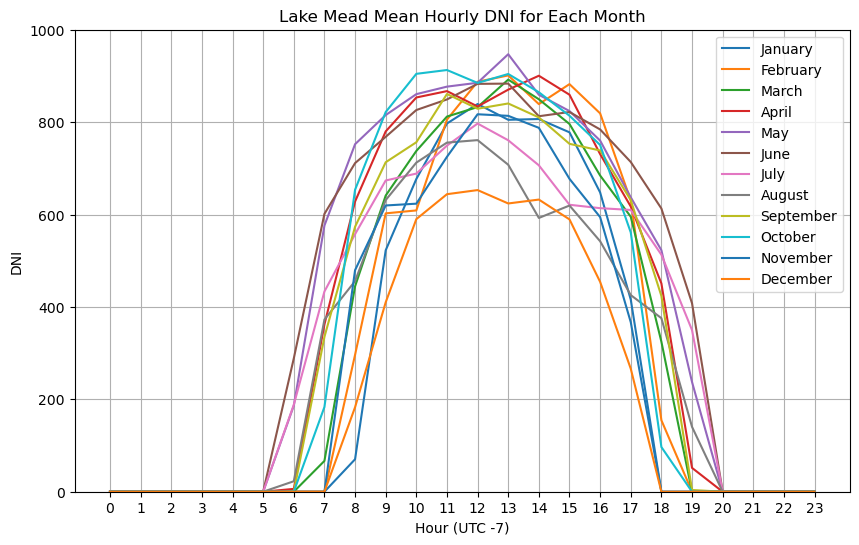

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column
for column in ds.columns:
    ax.plot(ds.index, ds[column], label=column)

# Adding labels and legend
ax.set_title('Lake Mead Mean Hourly DNI for Each Month')
ax.set_xlabel('Hour (UTC -7)')
ax.set_ylabel('DNI')
ax.grid(True)
ax.legend()
ax.set_ylim([0,1000])

ax.set_xticks(ds.index)

plt.show()

In [84]:
ds.to_csv('lake-mead-month.csv')